In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [29]:
df = pd.read_csv("/content/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [30]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [31]:
df.shape

(768, 7)

In [32]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['date'] = pd.to_datetime(df['date'])

print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   740 non-null    object        
 1   date                                     740 non-null    datetime64[ns]
 2   frequency                                740 non-null    object        
 3   estimated_unemployment_rate_(%)          740 non-null    float64       
 4   estimated_employed                       740 non-null    float64       
 5   estimated_labour_participation_rate_(%)  740 non-null    float64       
 6   area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None

Missing Values:
 region                                     28
date                                       28
frequency       

<ipython-input-32-9929192cc351>:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [33]:
print("Regions:", df['region'].unique())

print("Date Range:", df['date'].min(), "to", df['date'].max())

print(df['estimated_unemployment_rate_(%)'].describe())

Regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']
Date Range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: estimated_unemployment_rate_(%), dtype: float64


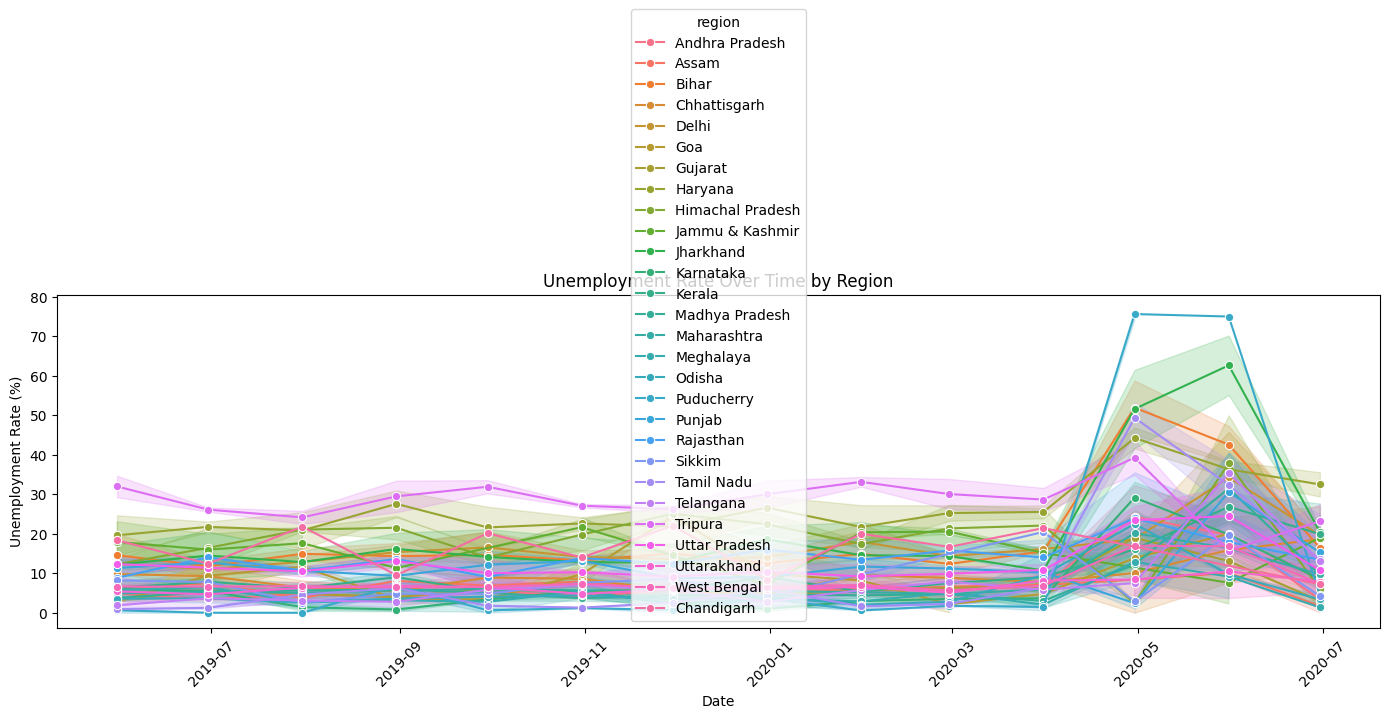

In [34]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df,x='date',y='estimated_unemployment_rate_(%)',hue='region',marker='o')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

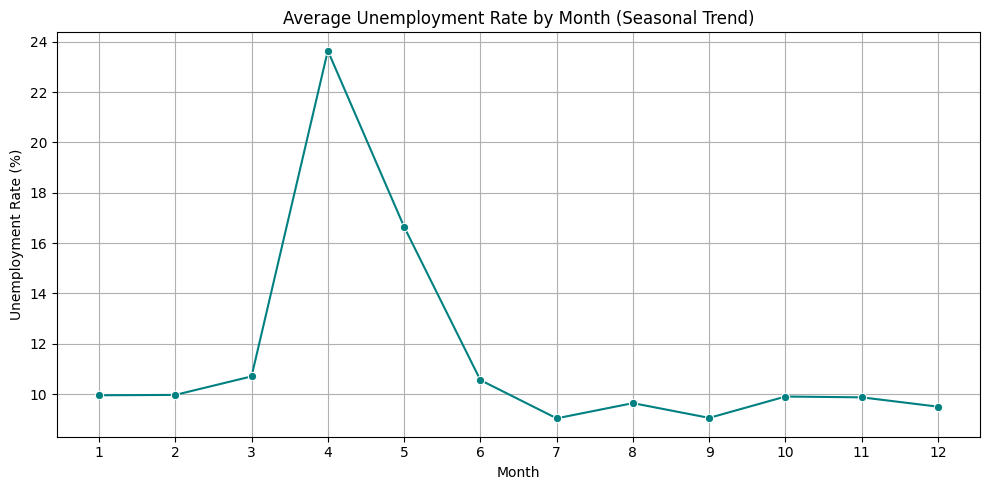

In [35]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

monthly_avg = df.groupby('month')['estimated_unemployment_rate_(%)'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='teal')
plt.title('Average Unemployment Rate by Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-36-a848f02d7d94>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_sorted, x='estimated_unemployment_rate_(%)', y='region', palette='viridis')


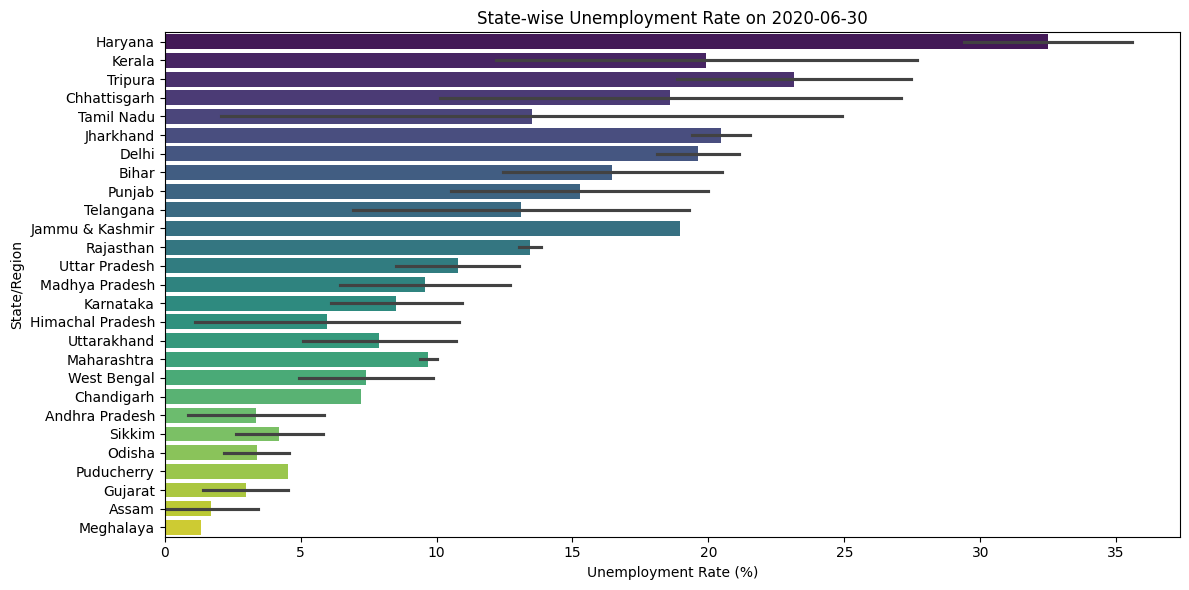

In [36]:
latest_date = df['date'].max()

latest_data = df[df['date'] == latest_date]

plt.figure(figsize=(12, 6))
latest_sorted = latest_data.sort_values('estimated_unemployment_rate_(%)', ascending=False)

sns.barplot(data=latest_sorted, x='estimated_unemployment_rate_(%)', y='region', palette='viridis')
plt.title(f"State-wise Unemployment Rate on {latest_date.date()}")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State/Region")
plt.tight_layout()
plt.show()

Average Unemployment Rate:
Pre-Covid: 9.51%
Covid Period: 17.77%
Post-Covid: nan%


<ipython-input-37-ff616f158a38>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=periods, y=averages, palette='Set2')


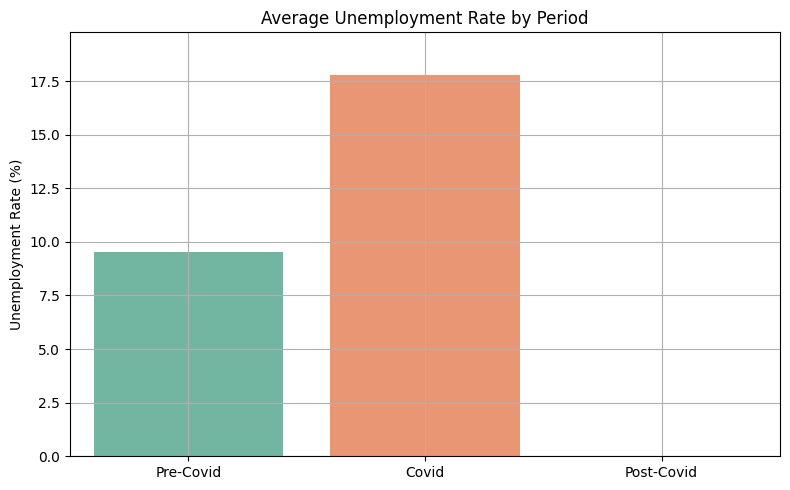

In [37]:
pre_covid = df[df['date'] < '2020-03-01']
covid = df[(df['date'] >= '2020-03-01') & (df['date'] <= '2021-12-31')]
post_covid = df[df['date'] > '2021-12-31']

pre_avg = pre_covid['estimated_unemployment_rate_(%)'].mean()
covid_avg = covid['estimated_unemployment_rate_(%)'].mean()
post_avg = post_covid['estimated_unemployment_rate_(%)'].mean()

print("Average Unemployment Rate:")
print(f"Pre-Covid: {pre_avg:.2f}%")
print(f"Covid Period: {covid_avg:.2f}%")
print(f"Post-Covid: {post_avg:.2f}%")

periods = ['Pre-Covid', 'Covid', 'Post-Covid']
averages = [pre_avg, covid_avg, post_avg]

plt.figure(figsize=(8, 5))
sns.barplot(x=periods, y=averages, palette='Set2')
plt.title('Average Unemployment Rate by Period')
plt.ylabel('Unemployment Rate (%)')
plt.ylim(0, max(averages) + 2)
plt.grid(True)
plt.tight_layout()
plt.show()

**Policy Recommendations:-**

1. State-Focused Employment Initiatives
Implement job creation programs tailored to states with higher unemployment rates.

2. Emergency Employment Support Systems
Establish fast-acting support systems to provide assistance during future crises, such as pandemics or natural disasters, to protect livelihoods.

3. Seasonal Workforce Assistance
Introduce temporary job or income support programs for seasonal workers—particularly in agriculture and among migrant populations—during periods of low employment demand.

4. Remote Work and Digital Skill Development
Expand access to digital literacy and remote work training, especially in rural and semi-urban areas, to open up new employment avenues beyond traditional industries.


5. Localized Unemployment Monitoring
Set up regular tracking of unemployment at more detailed administrative levels like districts or municipalities to ensure quicker and more effective policy responses.